In [1]:
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from numpy import nan
import matplotlib.pyplot as plt
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils.vis_utils import plot_model
from IPython.display import Image 

In [2]:
from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelBinarizer
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [3]:
import tensorflow as tf

In [4]:
path = './data_documentation/'
ranking_data = 'filtered_ranking_4_year_df.csv'

In [5]:
ranking_df = pd.read_csv(path + ranking_data, index_col = 0)

In [6]:
ranking_df

,Rank,CIP01BACHL,CIP04BACHL,CIP05BACHL,CIP26BACHL,CIP52BACHL,CIP09BACHL,CIP10BACHL,CIP11BACHL,CIP46BACHL,...,Alumni Salary,Acceptance Rate,SAT Lower,SAT Upper,ACT Lower,ACT Upper,10%_cut,5%_cut,20%_cut,50%_cut
0,456,0.0,0.0,1.0,1.0,2.0,1.0,0.0,1.0,0.0,...,87200.0,92.0,990.0,1370.0,21.0,28.0,7,14,3,1
1,475,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,...,103900.0,81.0,1080.0,1330.0,25.0,31.0,7,14,3,1
2,252,0.0,0.0,1.0,1.0,2.0,1.0,0.0,1.0,0.0,...,97400.0,53.0,1050.0,1280.0,23.0,32.0,3,7,1,0
3,166,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,...,104500.0,84.0,1130.0,1310.0,24.0,30.0,2,4,1,0
4,463,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,88300.0,62.0,1030.0,1260.0,23.0,29.0,7,14,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,118,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,110000.0,57.0,1150.0,1380.0,25.0,31.0,1,3,0,0
635,577,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,63.0,1190.0,1350.0,23.0,32.0,8,17,4,1
636,277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,86500.0,69.0,1190.0,1380.0,25.0,30.0,4,8,2,0
637,519,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,...,80000.0,64.0,1060.0,1210.0,21.0,25.0,7,15,3,1


In [7]:
y_data = ranking_df['20%_cut']

In [8]:
y = y_data.to_numpy()

In [9]:
ranking_df = ranking_df.drop(columns = ['Rank', '5%_cut', '10%_cut', '20%_cut', '50%_cut', 'INSTNM'])

In [10]:
ranking_df

,CIP01BACHL,CIP04BACHL,CIP05BACHL,CIP26BACHL,CIP52BACHL,CIP09BACHL,CIP10BACHL,CIP11BACHL,CIP46BACHL,CIP13BACHL,...,Student Population,Net Price,Average Grant Aid,Total Annual Cost,Alumni Salary,Acceptance Rate,SAT Lower,SAT Upper,ACT Lower,ACT Upper
0,0.0,0.0,1.0,1.0,2.0,1.0,0.0,1.0,0.0,1.0,...,20902,17535,9254,36800,87200.0,92.0,990.0,1370.0,21.0,28.0
1,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,9101,19986,9587,36881,103900.0,81.0,1080.0,1330.0,25.0,31.0
2,0.0,0.0,1.0,1.0,2.0,1.0,0.0,1.0,0.0,1.0,...,38563,21973,16494,46744,97400.0,53.0,1050.0,1280.0,23.0,32.0
3,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,29776,23416,9030,49954,104500.0,84.0,1130.0,1310.0,24.0,30.0
4,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1325,22853,26594,52414,88300.0,62.0,1030.0,1260.0,23.0,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,42699,13746,10703,41614,110000.0,57.0,1150.0,1380.0,25.0,31.0
635,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,386,20605,31845,65456,0.0,63.0,1190.0,1350.0,23.0,32.0
636,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,885,10248,9341,43678,86500.0,69.0,1190.0,1380.0,25.0,30.0
637,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,...,15317,15376,4726,39434,80000.0,64.0,1060.0,1210.0,21.0,25.0


In [11]:
# Splitting the data into training and test test
#X = ranking_df.iloc[:,1:196].values
X = ranking_df.values

In [12]:
X

array([[0.00e+00, 0.00e+00, 1.00e+00, ..., 1.37e+03, 2.10e+01, 2.80e+01],
       [0.00e+00, 0.00e+00, 0.00e+00, ..., 1.33e+03, 2.50e+01, 3.10e+01],
       [0.00e+00, 0.00e+00, 1.00e+00, ..., 1.28e+03, 2.30e+01, 3.20e+01],
       ...,
       [0.00e+00, 0.00e+00, 0.00e+00, ..., 1.38e+03, 2.50e+01, 3.00e+01],
       [0.00e+00, 0.00e+00, 0.00e+00, ..., 1.21e+03, 2.10e+01, 2.50e+01],
       [0.00e+00, 0.00e+00, 0.00e+00, ..., 1.13e+03, 2.00e+01, 2.50e+01]])

In [13]:
len(X[0])

122

In [14]:
X.shape

(639, 122)

In [15]:
y

array([3, 3, 1, 1, 3, 1, 4, 4, 4, 4, 1, 1, 3, 4, 2, 2, 2, 3, 3, 2, 0, 1,
       0, 3, 3, 2, 2, 3, 2, 3, 2, 3, 3, 3, 0, 0, 0, 0, 1, 0, 1, 2, 1, 0,
       0, 4, 3, 2, 0, 2, 4, 0, 1, 0, 0, 1, 0, 2, 1, 1, 3, 1, 2, 0, 2, 3,
       4, 0, 1, 3, 3, 4, 1, 0, 0, 1, 1, 4, 4, 2, 4, 0, 0, 1, 4, 1, 2, 0,
       0, 0, 1, 0, 2, 0, 0, 2, 4, 1, 3, 2, 2, 3, 2, 2, 2, 3, 1, 0, 0, 0,
       3, 3, 1, 1, 3, 3, 4, 3, 3, 2, 0, 0, 2, 4, 3, 0, 3, 4, 4, 3, 2, 4,
       3, 4, 3, 2, 4, 2, 0, 1, 3, 2, 4, 0, 1, 4, 1, 2, 2, 3, 1, 4, 4, 3,
       4, 0, 4, 4, 4, 0, 4, 3, 1, 0, 2, 2, 3, 2, 4, 4, 4, 0, 0, 0, 2, 1,
       3, 2, 3, 4, 3, 3, 2, 1, 0, 1, 1, 2, 3, 3, 3, 1, 2, 4, 4, 3, 3, 1,
       4, 4, 2, 3, 4, 4, 2, 4, 4, 1, 3, 3, 4, 4, 4, 0, 4, 0, 0, 0, 3, 3,
       3, 4, 0, 1, 1, 0, 2, 1, 1, 2, 2, 3, 0, 2, 0, 0, 0, 0, 1, 1, 2, 2,
       0, 0, 3, 1, 4, 0, 2, 2, 1, 1, 1, 2, 0, 1, 0, 0, 2, 1, 0, 0, 3, 4,
       4, 2, 4, 2, 3, 1, 1, 3, 0, 1, 2, 4, 4, 4, 2, 0, 2, 1, 3, 0, 4, 0,
       3, 2, 3, 1, 4, 1, 3, 0, 3, 1, 4, 2, 3, 3, 3,

In [16]:
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

In [17]:
y1

array([3, 3, 1, 1, 3, 1, 4, 4, 4, 4, 1, 1, 3, 4, 2, 2, 2, 3, 3, 2, 0, 1,
       0, 3, 3, 2, 2, 3, 2, 3, 2, 3, 3, 3, 0, 0, 0, 0, 1, 0, 1, 2, 1, 0,
       0, 4, 3, 2, 0, 2, 4, 0, 1, 0, 0, 1, 0, 2, 1, 1, 3, 1, 2, 0, 2, 3,
       4, 0, 1, 3, 3, 4, 1, 0, 0, 1, 1, 4, 4, 2, 4, 0, 0, 1, 4, 1, 2, 0,
       0, 0, 1, 0, 2, 0, 0, 2, 4, 1, 3, 2, 2, 3, 2, 2, 2, 3, 1, 0, 0, 0,
       3, 3, 1, 1, 3, 3, 4, 3, 3, 2, 0, 0, 2, 4, 3, 0, 3, 4, 4, 3, 2, 4,
       3, 4, 3, 2, 4, 2, 0, 1, 3, 2, 4, 0, 1, 4, 1, 2, 2, 3, 1, 4, 4, 3,
       4, 0, 4, 4, 4, 0, 4, 3, 1, 0, 2, 2, 3, 2, 4, 4, 4, 0, 0, 0, 2, 1,
       3, 2, 3, 4, 3, 3, 2, 1, 0, 1, 1, 2, 3, 3, 3, 1, 2, 4, 4, 3, 3, 1,
       4, 4, 2, 3, 4, 4, 2, 4, 4, 1, 3, 3, 4, 4, 4, 0, 4, 0, 0, 0, 3, 3,
       3, 4, 0, 1, 1, 0, 2, 1, 1, 2, 2, 3, 0, 2, 0, 0, 0, 0, 1, 1, 2, 2,
       0, 0, 3, 1, 4, 0, 2, 2, 1, 1, 1, 2, 0, 1, 0, 0, 2, 1, 0, 0, 3, 4,
       4, 2, 4, 2, 3, 1, 1, 3, 0, 1, 2, 4, 4, 4, 2, 0, 2, 1, 3, 0, 4, 0,
       3, 2, 3, 1, 4, 1, 3, 0, 3, 1, 4, 2, 3, 3, 3,

In [18]:
Y = pd.get_dummies(y1).values

In [19]:
Y

array([[0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0],
       ...,
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0]], dtype=uint8)

In [20]:
len(Y)

639

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [22]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

In [23]:
model = Sequential()
model.add(Dense(1000,input_dim = 122,activation='tanh', name = 'layer_1'))
#model.add(Dense(128,input_shape=(191,),activation='tanh', name = 'layer_1'))
#model.add(Dense(1000,activation='tanh', name = 'layer_2'))
#model.add(Dense(400,activation='tanh', name = 'layer_3'))
#model.add(Dense(400,activation='tanh', name = 'layer_4'))
#model.add(Dense(400,activation='tanh', name = 'layer_5'))
#model.add(Dense(400,activation='tanh', name = 'layer_6'))
model.add(Dense(5,activation='softmax'))

model.compile(Adam(lr=0.001),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_1 (Dense)              (None, 1000)              123000    
_________________________________________________________________
dense (Dense)                (None, 5)                 5005      
Total params: 128,005
Trainable params: 128,005
Non-trainable params: 0
_________________________________________________________________


In [24]:
X_train.shape

(511, 122)

In [25]:
y_train.shape

(511, 5)

In [26]:
#fitting the model and predicting 
model.fit(X_train,y_train,epochs=1000)
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/1000
16/16 [==============================] - 3s 183ms/step - loss: 1.9596 - accuracy: 0.2153
Epoch 2/1000
16/16 [==============================] - 3s 186ms/step - loss: 1.6222 - accuracy: 0.2896
Epoch 3/1000
16/16 [==============================] - 3s 178ms/step - loss: 1.5059 - accuracy: 0.3288
Epoch 4/1000
16/16 [==============================] - 3s 203ms/step - loss: 1.5053 - accuracy: 0.3327
Epoch 5/1000
16/16 [==============================] - 3s 197ms/step - loss: 1.5275 - accuracy: 0.3053
Epoch 6/1000
16/16 [==============================] - 3s 197ms/step - loss: 1.4681 - accuracy: 0.3131
Epoch 7/1000
16/16 [==============================] - 3s 212ms/step - loss: 1.4409 - accuracy: 0.3777
Epoch 8/1000
16/16 [==============================] - 3s 176ms/step - loss: 1.4029 - accuracy: 0.3953
Epoch 9/1000
16/16 [==============================] - 3s 199ms/step - loss: 1.4280 - accuracy: 0.3483
Epoch 10/1000
16/16 [==============================] - 2s 142ms/step - loss: 1.410

16/16 [==============================] - 0s 2ms/step - loss: 1.1109 - accuracy: 0.5440
Epoch 82/1000
16/16 [==============================] - 0s 2ms/step - loss: 1.1302 - accuracy: 0.5049
Epoch 83/1000
16/16 [==============================] - 0s 2ms/step - loss: 1.1288 - accuracy: 0.5264
Epoch 84/1000
16/16 [==============================] - 0s 2ms/step - loss: 1.1076 - accuracy: 0.5166
Epoch 85/1000
16/16 [==============================] - 0s 2ms/step - loss: 1.1296 - accuracy: 0.5303
Epoch 86/1000
16/16 [==============================] - 0s 2ms/step - loss: 1.1236 - accuracy: 0.5303
Epoch 87/1000
16/16 [==============================] - 0s 2ms/step - loss: 1.1441 - accuracy: 0.5010
Epoch 88/1000
16/16 [==============================] - 0s 2ms/step - loss: 1.1833 - accuracy: 0.5068
Epoch 89/1000
16/16 [==============================] - 0s 2ms/step - loss: 1.1318 - accuracy: 0.5127
Epoch 90/1000
16/16 [==============================] - 0s 2ms/step - loss: 1.1079 - accuracy: 0.5225
Epoc

16/16 [==============================] - 0s 2ms/step - loss: 1.0078 - accuracy: 0.5871
Epoch 162/1000
16/16 [==============================] - 0s 2ms/step - loss: 1.0327 - accuracy: 0.5577
Epoch 163/1000
16/16 [==============================] - 0s 2ms/step - loss: 1.0298 - accuracy: 0.5538
Epoch 164/1000
16/16 [==============================] - 0s 2ms/step - loss: 1.0558 - accuracy: 0.5362
Epoch 165/1000
16/16 [==============================] - 0s 2ms/step - loss: 1.0190 - accuracy: 0.5656
Epoch 166/1000
16/16 [==============================] - 0s 2ms/step - loss: 1.0786 - accuracy: 0.5538
Epoch 167/1000
16/16 [==============================] - 0s 2ms/step - loss: 1.0625 - accuracy: 0.5538
Epoch 168/1000
16/16 [==============================] - 0s 2ms/step - loss: 1.0220 - accuracy: 0.5636
Epoch 169/1000
16/16 [==============================] - 0s 2ms/step - loss: 1.0290 - accuracy: 0.5538
Epoch 170/1000
16/16 [==============================] - 0s 2ms/step - loss: 1.0284 - accuracy: 0.

16/16 [==============================] - 0s 2ms/step - loss: 0.9767 - accuracy: 0.5988
Epoch 242/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.9903 - accuracy: 0.5949
Epoch 243/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.9643 - accuracy: 0.5988
Epoch 244/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.9571 - accuracy: 0.6008
Epoch 245/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.9478 - accuracy: 0.6243
Epoch 246/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.9927 - accuracy: 0.5695
Epoch 247/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.9726 - accuracy: 0.5793
Epoch 248/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.9724 - accuracy: 0.6145
Epoch 249/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.9436 - accuracy: 0.6262
Epoch 250/1000
16/16 [==============================] - 0s 2ms/step - loss: 1.0074 - accuracy: 0.

16/16 [==============================] - 0s 2ms/step - loss: 0.9893 - accuracy: 0.6008
Epoch 322/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.9251 - accuracy: 0.6380
Epoch 323/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.9601 - accuracy: 0.5930
Epoch 324/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.9418 - accuracy: 0.6125
Epoch 325/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.9154 - accuracy: 0.6145
Epoch 326/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.9660 - accuracy: 0.5930
Epoch 327/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.9242 - accuracy: 0.6204
Epoch 328/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.9249 - accuracy: 0.6243
Epoch 329/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.9455 - accuracy: 0.5949
Epoch 330/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.9407 - accuracy: 0.

16/16 [==============================] - 0s 2ms/step - loss: 0.8830 - accuracy: 0.6243
Epoch 402/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.9022 - accuracy: 0.6321
Epoch 403/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.9247 - accuracy: 0.6164
Epoch 404/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8939 - accuracy: 0.6262
Epoch 405/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8915 - accuracy: 0.6223
Epoch 406/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8916 - accuracy: 0.6380
Epoch 407/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.9282 - accuracy: 0.6125
Epoch 408/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.9278 - accuracy: 0.5930
Epoch 409/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.9525 - accuracy: 0.6125
Epoch 410/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8953 - accuracy: 0.

16/16 [==============================] - 0s 2ms/step - loss: 0.8730 - accuracy: 0.6419
Epoch 482/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8790 - accuracy: 0.6477
Epoch 483/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8755 - accuracy: 0.6341
Epoch 484/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.8924 - accuracy: 0.6164
Epoch 485/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8608 - accuracy: 0.6399
Epoch 486/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8875 - accuracy: 0.6184
Epoch 487/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8803 - accuracy: 0.6321
Epoch 488/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.9010 - accuracy: 0.6321
Epoch 489/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8962 - accuracy: 0.6204
Epoch 490/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8705 - accuracy: 0.

16/16 [==============================] - 0s 3ms/step - loss: 0.8559 - accuracy: 0.6419
Epoch 562/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.8730 - accuracy: 0.6517
Epoch 563/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8661 - accuracy: 0.6282
Epoch 564/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8550 - accuracy: 0.6497
Epoch 565/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8730 - accuracy: 0.6360
Epoch 566/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8594 - accuracy: 0.6438
Epoch 567/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8414 - accuracy: 0.6693
Epoch 568/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.8669 - accuracy: 0.6301
Epoch 569/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8685 - accuracy: 0.6282
Epoch 570/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8791 - accuracy: 0.

16/16 [==============================] - 0s 2ms/step - loss: 0.8400 - accuracy: 0.6595
Epoch 642/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8474 - accuracy: 0.6497
Epoch 643/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8421 - accuracy: 0.6399
Epoch 644/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8569 - accuracy: 0.6497
Epoch 645/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8366 - accuracy: 0.6830
Epoch 646/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8492 - accuracy: 0.6517
Epoch 647/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8383 - accuracy: 0.6673
Epoch 648/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8247 - accuracy: 0.6497
Epoch 649/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8632 - accuracy: 0.6164
Epoch 650/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8257 - accuracy: 0.

16/16 [==============================] - 0s 2ms/step - loss: 0.8682 - accuracy: 0.6438
Epoch 722/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8496 - accuracy: 0.6634
Epoch 723/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8631 - accuracy: 0.6399
Epoch 724/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8264 - accuracy: 0.6575
Epoch 725/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8378 - accuracy: 0.6556
Epoch 726/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8432 - accuracy: 0.6575
Epoch 727/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8442 - accuracy: 0.6380
Epoch 728/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8592 - accuracy: 0.6438
Epoch 729/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8137 - accuracy: 0.6693
Epoch 730/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8157 - accuracy: 0.

16/16 [==============================] - 0s 2ms/step - loss: 0.8385 - accuracy: 0.6595
Epoch 802/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8023 - accuracy: 0.6614
Epoch 803/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.7934 - accuracy: 0.6673
Epoch 804/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8075 - accuracy: 0.6595
Epoch 805/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8027 - accuracy: 0.6614
Epoch 806/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.8120 - accuracy: 0.6497
Epoch 807/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8102 - accuracy: 0.6536
Epoch 808/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8273 - accuracy: 0.6673
Epoch 809/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8223 - accuracy: 0.6732
Epoch 810/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8325 - accuracy: 0.

Epoch 881/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.7941 - accuracy: 0.6771
Epoch 882/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.8111 - accuracy: 0.6614
Epoch 883/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.8219 - accuracy: 0.6575
Epoch 884/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.8403 - accuracy: 0.6497
Epoch 885/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.8491 - accuracy: 0.6556
Epoch 886/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.8118 - accuracy: 0.6693
Epoch 887/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.8114 - accuracy: 0.6595
Epoch 888/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.8007 - accuracy: 0.6908
Epoch 889/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.8107 - accuracy: 0.6556
Epoch 890/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.8330

16/16 [==============================] - 0s 3ms/step - loss: 0.7971 - accuracy: 0.6791
Epoch 962/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.7840 - accuracy: 0.6751
Epoch 963/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.8079 - accuracy: 0.6673
Epoch 964/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.7855 - accuracy: 0.6928
Epoch 965/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.7837 - accuracy: 0.6771
Epoch 966/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.7869 - accuracy: 0.6849
Epoch 967/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.8374 - accuracy: 0.6438
Epoch 968/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8073 - accuracy: 0.6654
Epoch 969/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.8108 - accuracy: 0.6595
Epoch 970/1000
16/16 [==============================] - 0s 3ms/step - loss: 0.7996 - accuracy: 0.

In [27]:

#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))


              precision    recall  f1-score   support

           0       0.79      0.79      0.79        28
           1       0.33      0.26      0.29        23
           2       0.27      0.40      0.32        25
           3       0.25      0.23      0.24        22
           4       0.52      0.43      0.47        30

    accuracy                           0.44       128
   macro avg       0.43      0.42      0.42       128
weighted avg       0.45      0.44      0.44       128

[[22  4  1  1  0]
 [ 3  6  9  4  1]
 [ 1  4 10  3  7]
 [ 2  2  9  5  4]
 [ 0  2  8  7 13]]


In [28]:
# Summary of neural network
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_1 (Dense)              (None, 1000)              123000    
_________________________________________________________________
dense (Dense)                (None, 5)                 5005      
Total params: 128,005
Trainable params: 128,005
Non-trainable params: 0
_________________________________________________________________


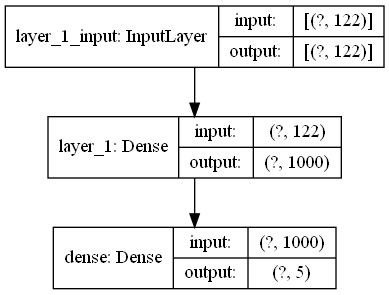

In [29]:
plot_model(model, show_shapes=True, show_layer_names=True, expand_nested = True, to_file='model.png')

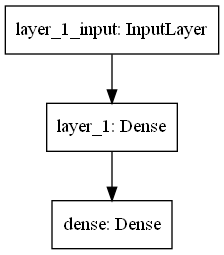

In [32]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=False, show_layer_names=True,
    rankdir='TB', expand_nested=True, dpi=96
)
